# **Exploratory Data Analyst BMI**
---
pada bagian ini kita akan membuat analisis untuk menemukan insight dan menjadikan nya sebagai informasi dari data yang kita miliki 
> Portofolio Machine Learning 

## **1.Data Wrangling**
---
pada bagian ini kita akan melakukan pembersihan dan pengecekan pada datasheet yang kita miliki


### **1.1 import library dan load datasheet**

In [ ]:
# import library yang digunakan 
import numpy as np                  # library untuk komputasi numerik dengan library numpy 
import pandas as pd                 # library untuk pengolahan datafarme 
import matplotlib.pyplot as plt     # library untuk visualisasi data 
import seaborn as sns               # library untuk visualisasi data p

# load datasheet yang akan digunakan
df = pd.read_csv('../Data/bmi.csv')

# tampilkan isi dari datasheet 
print(df)

     Gender  Height  Weight  Index
0      Male     174      96      4
1      Male     189      87      2
2    Female     185     110      4
3    Female     195     104      3
4      Male     149      61      3
..      ...     ...     ...    ...
495  Female     150     153      5
496  Female     184     121      4
497  Female     141     136      5
498    Male     150      95      5
499    Male     173     131      5

[500 rows x 4 columns]


<b>Insight :</b>
<p>sekrang kita telah berhasil menambahkan datahsheet dan menampilkan 5 data teratas dan terakhir</p>

### **1.2 melihat informasi dari datasheet yang kita gunakan**
---
<p>tahap selanjutnya kita akan melihat informasi dari datasheet untuk mengetahui jumlah kolom dan baris</p>

In [2]:
print(f'jumlah baris dari datasheet yang kita punya berjumlah : {df.shape[0] } baris')
print(f'jumlah kolom dari datasheet yang kita punya berjumlah : {df.shape[1]} kolom')

jumlah baris dari datasheet yang kita punya berjumlah : 500 baris
jumlah kolom dari datasheet yang kita punya berjumlah : 4 kolom


<b>Insight : </b>
<ul>
    <li>ternyata jumlah baris kita berjumlah 500 data, meskipun sedikit kita akan mencoba mengoptimalkan data tersebut untuk membuat model yang efesien</li>
    <li>kita memiliki 4 kolom fitur data yang bisa kita gunakan untuk analisis lebih lanjut</li>
</ul>

### **1.3 Mengecek duplikasi dan missing value dari datasheet yang kita punya**
---
selanjutnya kita akan melakukan pengecekan apakah ada data yang mengalami missing value atau duplikasi 

In [3]:
# mengecek duplikasi dan missing value dengan menggunakan pandas 
print(f'jumlah duplikasi : {df.duplicated().sum()} data')

jumlah duplikasi : 11 data


<b>Insight :</b>
<p>ternyata dari datahsheet kita ada 11 data yang mengalami duplikasi, tetapi karena jumlah data kita yang hanya berjumlah sedikit sekitar 500 data, kita tidak akan menghapus duplikasi tersebut akan tetapi kita akan memilih model yang tahan terhadap duplikasi</p>

sekarang kita akan melakukan pengecekan apakah terdapat data yang mengalami missing value atau bernilai null

In [4]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

     Gender  Height  Weight  Index
187  Female     182      84      3
310    Male     171     147      5
327  Female     167      85      4
355    Male     174      90      3
365    Male     141      80      5
381    Male     191      62      1
382    Male     177     117      4
395  Female     164      71      3
400  Female     195     104      3
462    Male     179      56      1
482  Female     142      86      5


## **2.Exploratory Data Analyst**
---
selanjutnya kita akan melakukan analisis lebih lanjut dengan melakukan pendekatan EDA untuk mendapatkan insight yang kemudian hari bisa dijadikan sebagai informasi yang berharga

### **2.1 Merubah Kategorisasi Data**
---
pada tahap ini kita akan melakukan preprocessing untuk fitur Index danan melakukan kategorisasi ke beberapa label kelas

In [5]:
# buat fungsi kategorisasi untuk merubah fitur status menjadi beberapa kategori 
def convert_status_to_description(x):
    if x['Index'] == 0:
        return 'Extremely Weak'
    elif x['Index'] == 1:
        return 'Weak'
    elif x['Index'] == 2:
        return 'Normal'
    elif x['Index'] == 3:
        return 'Overweight'
    elif x['Index'] == 4:
        return 'Obesity'
    elif x['Index'] == 5:
        return 'Extreame Obesity'

# copy datasheet dari variable df ke variabel data dengan tujuan memisahkan data raw dengan data analisis
data = df.copy()

# konversi fitur index dan buat tabel status untuk menyimpan hasil konversi 
data['Status'] = data.apply(convert_status_to_description, axis=1)

# tampilkan hasil konversi 
print(data)

     Gender  Height  Weight  Index            Status
0      Male     174      96      4           Obesity
1      Male     189      87      2            Normal
2    Female     185     110      4           Obesity
3    Female     195     104      3        Overweight
4      Male     149      61      3        Overweight
..      ...     ...     ...    ...               ...
495  Female     150     153      5  Extreame Obesity
496  Female     184     121      4           Obesity
497  Female     141     136      5  Extreame Obesity
498    Male     150      95      5  Extreame Obesity
499    Male     173     131      5  Extreame Obesity

[500 rows x 5 columns]


<b>Insight : </b>
<p>sekarang kita memiliki kolom status dari hasil konversi dari datasheet raw yang kiat miliki</p>

#### **2.1.1 Mengkonversi Fitur Gender ke Tipe Data Numerik**
---
sekarang kita akan mengkonversi fitur gender dari datasheet data ke tipe data numerik agar bisa dilakukan analisis dan pembuatan visualisasi

In [6]:
# melakukan konversi tipe data untuk gender dari object ke numerik dan menambahkan kolom baru dengan nama gender label 
def convert_gender_to_label(x):
    if x['Gender'] == 'Male':
        return 1
    if x['Gender'] == 'Female':
        return 0

data['gen_lbl'] = data.apply(convert_gender_to_label, axis=1)
print(data.head())

   Gender  Height  Weight  Index      Status  gen_lbl
0    Male     174      96      4     Obesity        1
1    Male     189      87      2      Normal        1
2  Female     185     110      4     Obesity        0
3  Female     195     104      3  Overweight        0
4    Male     149      61      3  Overweight        1


<b>Insight:</b>
<p>proses binning dilakukan untuk membuat kategorisasi agar lebih mudah untuk dilakukan analisis dan pembuatan model machine learning. pada analisis ini kita membuat kategori pada kolom index dan gender</p>

### **2.2 Melakukan Group By dan Aggregasi Nilai Max dan Min dari fitur Height, Weight**
---
<p>setelah proses kategori telah selesai selanjutnya kita akan membuat analisis groupby untuk mencari aggregasi dari nilai maksimal dan minimal untuk fitur tinggi badan dan berat badan</p>

#### **2.2.1 Aggeregasi Untuk analsis tinggi badan Male vs Female**
---
pada tahap ini kita akan melakukan analisis duntuk mencari nilai tertinggi dari setiap status berat badan antara laki-laki dan perempuan

In [7]:
# melakukan aggregasi untuk mencari nilai max dan min dari kolom tabel tinggi badan
df_agg = pd.pivot_table(data = data, index='Gender', columns='Status', values='Height').round(2)
print(df_agg)

Status  Extreame Obesity  Extremely Weak  Normal  Obesity  Overweight    Weak
Gender                                                                       
Female            161.57          186.57  171.68   174.34      176.94  184.14
Male              160.46          188.67  178.04   173.32      174.91  185.07


 Dari hasil analisis tersebut, kita bisa mendapatkan beberapa insight menarik mengenai tinggi badan berdasarkan status kesehatan dan jenis kelamin:

1. **Perbedaan Tinggi Badan Berdasarkan Jenis Kelamin**:
   - Secara umum, tinggi badan rata-rata untuk kategori kesehatan yang sama cenderung lebih tinggi pada pria dibandingkan wanita. Misalnya, pada kategori "Normal", tinggi badan rata-rata pria adalah 178.04 cm, sedangkan wanita adalah 171.68 cm.

2. **Variasi Tinggi Badan Berdasarkan Status Kesehatan**:
   - Kategori "Extremely Weak" menunjukkan tinggi badan rata-rata tertinggi untuk kedua jenis kelamin, dengan wanita memiliki rata-rata 186.57 cm dan pria 188.67 cm.
   - Kategori "Normal" memiliki tinggi badan rata-rata yang cukup tinggi, dengan wanita 171.68 cm dan pria 178.04 cm.
   - Kategori "Extreme Obesity" memiliki tinggi badan rata-rata terendah untuk kedua jenis kelamin, dengan wanita 161.57 cm dan pria 160.46 cm.

3. **Korelasi Antara Status Kesehatan dan Tinggi Badan**:
   - Ada indikasi bahwa status kesehatan tertentu mungkin berkorelasi dengan tinggi badan. Misalnya, individu dengan status "Extremely Weak" cenderung memiliki tinggi badan yang lebih tinggi dibandingkan dengan kategori lainnya.
   - Sebaliknya, individu dengan status "Extreme Obesity" cenderung memiliki tinggi badan yang lebih rendah.

4. **Distribusi Tinggi Badan dalam Kategori Kesehatan**:
   - Kategori "Weak" dan "Overweight" menunjukkan tinggi badan rata-rata yang cukup tinggi, dengan wanita memiliki rata-rata 184.14 cm dan 176.94 cm, serta pria 185 cm dan 174.91 cm.

Insight ini dapat membantu dalam memahami bagaimana tinggi badan bervariasi berdasarkan status kesehatan dan jenis kelamin, yang bisa berguna untuk penelitian lebih lanjut atau intervensi kesehatan. Jika ada yang ingin Anda tambahkan atau ubah, beri tahu saya ya!

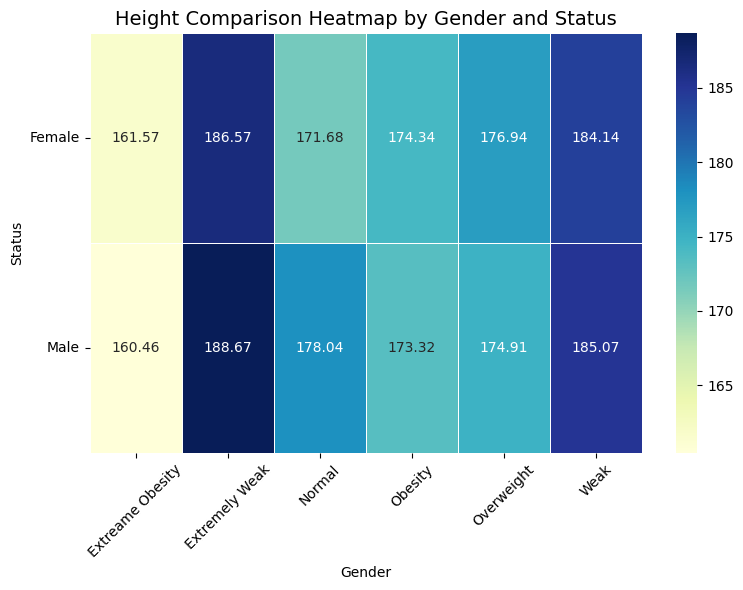

In [8]:
# Visualisasi Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_agg, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)

plt.title('Height Comparison Heatmap by Gender and Status', fontsize=14)
plt.xlabel('Gender', fontsize=10)
plt.ylabel('Status', fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()


# menyimpan hasil visualisasi 
# plt.savefig('heatmap_height_comparison.png', dpi=300)
plt.show()

<b>Insight :</b>
<p>dari hasil tersebut ternyata diketahui bahwa tinggi badan sangat berpengaruh pada kenaikan berat badan dimana jika tinggi 

#### **2.2.2 Aggregasi Untuk Analisis Berat Badan Male vs Female** 

In [9]:
# melakukan aggregasi untuk mencari nilai max dan min dari kolom tabel tinggi badan
df_agg = pd.pivot_table(data = data, index='Gender', columns='Status', values='Weight').round(2)
print(df_agg)

Status  Extreame Obesity  Extremely Weak  Normal  Obesity  Overweight   Weak
Gender                                                                      
Female            135.53           51.86   66.93   108.07       87.72  58.71
Male              130.55           51.50   72.25   107.81       85.94  59.73


Dari hasil analisis tersebut, kita bisa mendapatkan beberapa insight menarik mengenai berat badan berdasarkan status kesehatan dan jenis kelamin:

1. **Perbedaan Berat Badan Berdasarkan Jenis Kelamin**:
   - Secara umum, berat badan rata-rata untuk kategori kesehatan yang sama cenderung lebih tinggi pada pria dibandingkan wanita. Misalnya, pada kategori "Normal", berat badan rata-rata pria adalah 72.25 kg, sedangkan wanita adalah 66.93 kg.

2. **Variasi Berat Badan Berdasarkan Status Kesehatan**:
   - Kategori "Extremely Weak" menunjukkan berat badan rata-rata terendah untuk kedua jenis kelamin, dengan wanita memiliki rata-rata 51.86 kg dan pria 51.50 kg.
   - Kategori "Extreme Obesity" memiliki berat badan rata-rata tertinggi untuk kedua jenis kelamin, dengan wanita 135.53 kg dan pria 130.55 kg.

3. **Korelasi Antara Status Kesehatan dan Berat Badan**:
   - Ada indikasi bahwa status kesehatan tertentu berkorelasi dengan berat badan. Misalnya, individu dengan status "Extreme Obesity" cenderung memiliki berat badan yang jauh lebih tinggi dibandingkan dengan kategori lainnya.
   - Sebaliknya, individu dengan status "Extremely Weak" cenderung memiliki berat badan yang jauh lebih rendah.

4. **Distribusi Berat Badan dalam Kategori Kesehatan**:
   - Kategori "Obesity" dan "Overweight" menunjukkan berat badan rata-rata yang cukup tinggi, dengan wanita memiliki rata-rata 108.07 kg dan 87.72 kg, serta pria 107.81 kg dan 85.94 kg.
   - Kategori "Weak" menunjukkan berat badan rata-rata yang lebih rendah, dengan wanita 58.71 kg dan pria 59.73 kg.

Insight ini dapat membantu dalam memahami bagaimana berat badan bervariasi berdasarkan status kesehatan dan jenis kelamin, yang bisa berguna untuk penelitian lebih lanjut atau intervensi kesehatan. Jika ada yang ingin Anda tambahkan atau ubah, beri tahu saya ya!

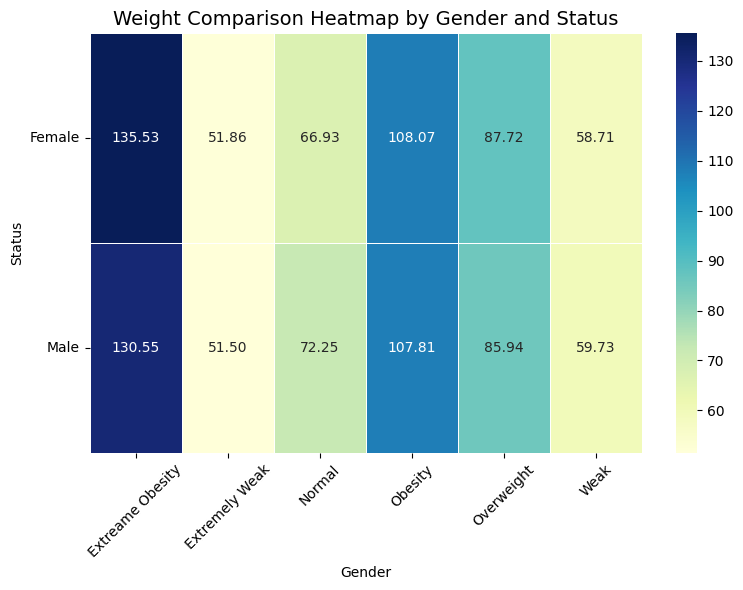

In [10]:
# Visualisasi Heatmap untuk berat badan
plt.figure(figsize=(8, 6))
sns.heatmap(df_agg, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)

plt.title('Weight Comparison Heatmap by Gender and Status', fontsize=14)
plt.xlabel('Gender', fontsize=10)
plt.ylabel('Status', fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()

# menyimpan hasil visualisasi 
# plt.savefig('heatmap_weight_comparison.png', dpi=300)
plt.show()

### **2.3 Analisis data kategorik**

In [11]:
people = data['Gender'].value_counts()

print(type(people))
people.head()

<class 'pandas.core.series.Series'>


Gender
Female    255
Male      245
Name: count, dtype: int64

<b>Insight :</b>
Distribusi Gender:
Terdapat 255 individu berjenis kelamin perempuan dan 245 individu berjenis kelamin laki-laki dalam dataset ini.
Distribusi ini menunjukkan bahwa jumlah perempuan sedikit lebih banyak dibandingkan laki-laki, dengan perbedaan sebanyak 10 individu.

In [12]:
# buat analisis untuk fitur yang memiliki tipe data numerik 
categories = data['Status'].value_counts()

# tampilkan hasil analisis 
print(categories)

Status
Extreame Obesity    198
Obesity             130
Normal               69
Overweight           68
Weak                 22
Extremely Weak       13
Name: count, dtype: int64


<html>
    <b>Insight:</b>
    <li> 1. jumlah orang dengan klasifikasi berat badan extreme obesity bejumlah 198 orang</li>
    <li> 2. jumlah orang dengan klasifikasi berat badan obesitas berjumlah 130 orang</li>
    <li> 3. jumlah orang dengan klasifikasi berat badan normal berjumlah 69 orang</li>
    <li> 4. jumlah orang dengan klasifikasi berat badan overweight berjumlah 68 orang</li>
    <li> 5. jumlah orang dengan klasifikasi berat badan weak berjumlah 22 orang</li>
    <li> 6. jumlah orang dengan klasifikasi berat nadan extremely weak berjumlah 13 orang </li>
    <hr>
    <p> dari hasil analisis tersebut jumlah orang yang mengidap berat badan extreme sangat lah banyak sehingga kedepannya diharapkan dilakukan penyuluhan akan pola hidup yang sehat</p>

#### **2.3.1 Analisis fitur untuk gender male**

In [13]:
# buat code untuk kategori dengan jenis kelamin laki-laki
cat_male = data[data['Gender'] == 'Male']

# kelompokan status BMI Untuk jenisk kelami laki-laki
male_categories = cat_male['Status'].value_counts()

# tampilkan isi dari variabel male categories 
print(male_categories)

Status
Extreame Obesity    105
Obesity              59
Overweight           32
Normal               28
Weak                 15
Extremely Weak        6
Name: count, dtype: int64


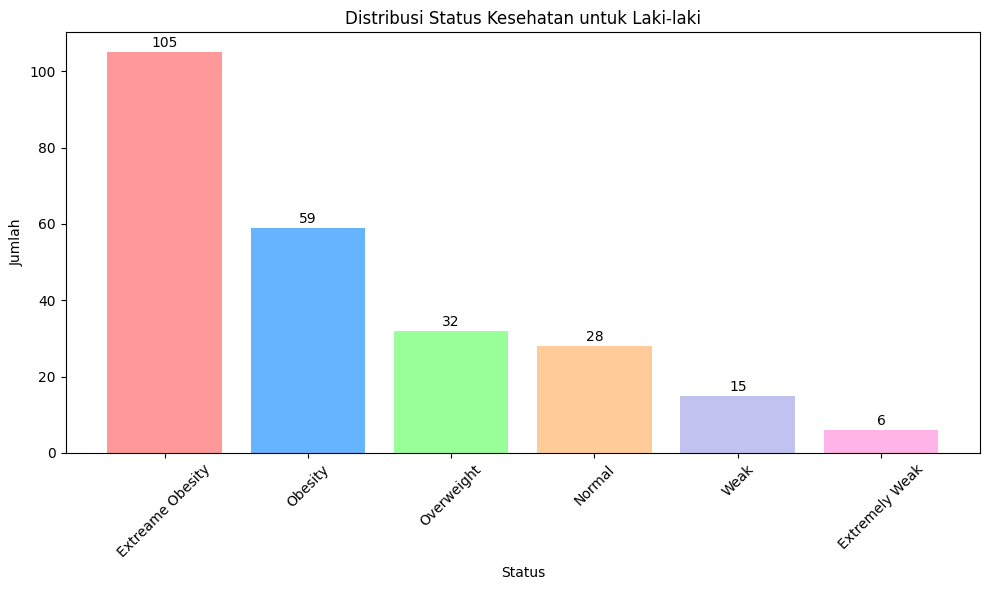

In [14]:
# Data hasil output
status = male_categories.index.tolist()
count = male_categories.values.tolist()

# Membuat visualisasi
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(status, count, color=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6'])

# Menambahkan anotasi untuk setiap bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom')

ax.set_title('Distribusi Status Kesehatan untuk Laki-laki')
ax.set_xlabel('Status')
ax.set_ylabel('Jumlah')

plt.xticks(rotation=45)
plt.tight_layout()

# Menyimpan grafik sebagai file gambar
# plt.savefig('distribusi_status_kesehatan_laki_laki.png')

plt.show()

<b>Insight:</b>
<li>1.jumlah laki-laki yang mengidap berat badan extreme berjumlah 105 orang</li>
<li>2.jumlah laki-laki yang mengidap berat badan obsitas berjumlah 59 orang</li>
<li>3.jumlah laki-laki yang mengidap berat badan overweight berjumlah 32 orang</li>
<li>4.jumlah laki-laki yang mengidap berat badan normal berjumlah 28 orang</li>
<li>5.jumlah laki-laki yang mengidap berat badan kurus berjumlah 15 orang</li>
<li>6.jumlah laki-laki yang mengidap berat badan gizi buruk berjumlah 6 orang</li>
<p> dari analisis ini dapat diketahui bahwa laki-laki lebih sulit menjaga berat badan dibanding dengan perempuan</p>

#### **2.3.2 Analisis fitur gender untuk female**

In [15]:
# buat code untuk kategori dengan jenis kelamin laki-laki
cat_female = data[data['Gender'] == 'Female']

# kelompokan status BMI Untuk jenisk kelami laki-laki
female_categories = cat_female['Status'].value_counts()

# tampilkan isi dari variabel male categories 
print(female_categories)

Status
Extreame Obesity    93
Obesity             71
Normal              41
Overweight          36
Weak                 7
Extremely Weak       7
Name: count, dtype: int64


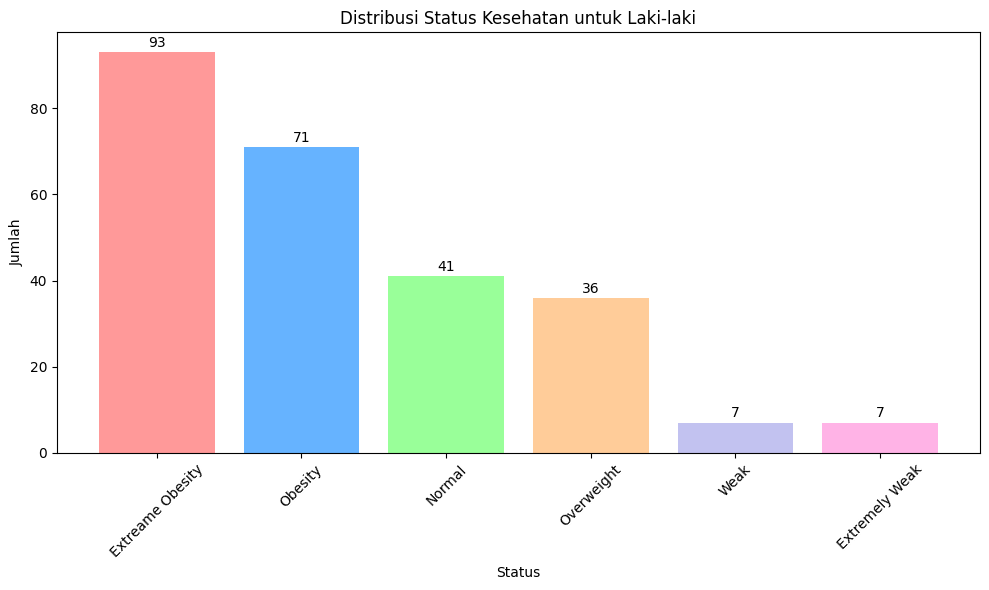

In [16]:
# Data hasil output
status = female_categories.index.tolist()
count = female_categories.values.tolist()

# Membuat visualisasi
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(status, count, color=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6'])

# Menambahkan anotasi untuk setiap bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom')

ax.set_title('Distribusi Status Kesehatan untuk Laki-laki')
ax.set_xlabel('Status')
ax.set_ylabel('Jumlah')

plt.xticks(rotation=45)
plt.tight_layout()

# Menyimpan grafik sebagai file gambar
# plt.savefig('distribusi_status_kesehatan_perempuan.png')

plt.show()

<b>Insight:</b>
<li>jumlah perempuan yang mengidap berat badan extreme berjumlah 93 orang</li>
<li>jumlah perempuan yang mengidap berat badan obsitas berjumlah 71 orang</li>
<li>jumlah perempuan yang mengidap berat badan overweight berjumlah 36 orang</li>
<li>jumlah perempuan yang mengidap berat badan normal berjumlah 41 orang</li>
<li>jumlah perempuan yang mengidap berat badan kurus berjumlah 7 orang</li>
<li>jumlah perempuan yang mengidap berat badan gizi buruk berjumlah 7 orang</li>
<p> dari analisis ini dapat diketahui bahwa perempuan lebih bisa menjaga berat badan dibanding dengan laki-laki</p>

#### **2.3.3 visualisasi barplot**

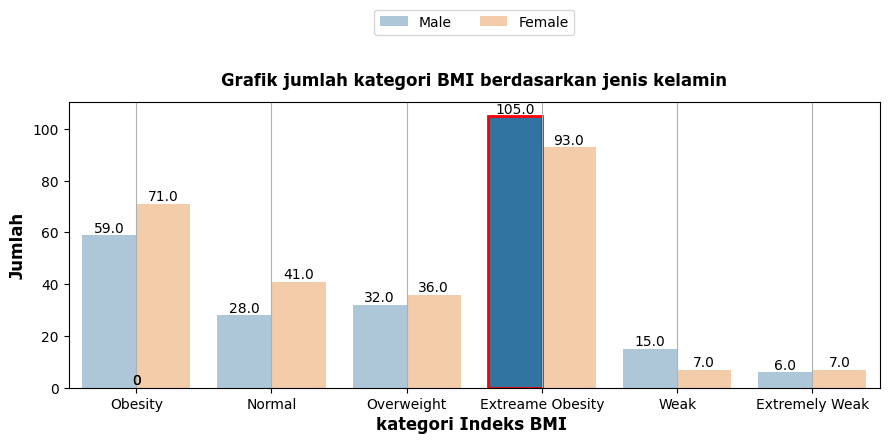

In [17]:
from matplotlib.patches import Rectangle

# Membuat visualisasi
fig, ax = plt.subplots(figsize=(9, 4))
sns.countplot(x='Status', data=data, hue='Gender', ax=ax)

ax.grid(axis='x')
plt.title("Grafik jumlah kategori BMI berdasarkan jenis kelamin",
        fontsize=12, fontweight='bold', fontfamily='verdana', pad=2.0, color='black', loc="center", y=1.05)

ax.set_xlabel("kategori Indeks BMI ", fontsize=12, fontweight='bold', fontfamily='verdana')
ax.set_ylabel("Jumlah", fontsize=12, fontweight='bold', fontfamily='verdana')

# Menambahkan anotasi untuk setiap bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Menemukan bar tertinggi
max_height = max([p.get_height() for p in ax.patches])
max_patches = [p for p in ax.patches if p.get_height() == max_height]

# Menambahkan blur pada bar yang lain
for p in ax.patches:
    if p not in max_patches:
        p.set_alpha(0.4)  # Mengatur transparansi untuk efek blur

# Menyoroti bar tertinggi dengan kotak
for p in max_patches:
    ax.add_patch(Rectangle((p.get_x(), 0), p.get_width(), max_height, fill=False, edgecolor='red', linewidth=2))

# Add a legend
pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width, pos.height * 0.85])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.35), ncol=3)

plt.tight_layout()

# Menyimpan grafik sebagai file gambar
# plt.savefig('barplot_bmi_male_vs_female_highlighted.png')

plt.show()

<b>Insight :</b>
dari hasil visualisasi diatas dapat diketahui bahwa antara laki-laki dan perempuan dalam hal menjaga berat badan, laki-laki lebih sulit untuk menjaga berat badan ketimbang perempuan dan bisa kita simpulkan bahwa mungkin banyak factor yang mempengaruhi hal tersebut untuk terjadi 

### **2.4 Analisis outlier dengan visualisasi boxplot**
---
pada tahap ini kita akan mencoba melakukan analisis untuk memastikan apakah datasheet yang kita gunakan memiliki nilai yang diluar ambang batas atau outliers yang mungkin saja dapat mempengaruhi pada saat pembuatan model machine learning

In [18]:
# pertama kita akan merubah kolom fitur gen_lbl menjadi label dengan label 1 sebagai male dan 0 sebagai perempuan 
data = data.rename(columns={'gen_lbl':'Label'})

# tampilkan 5 data teratas 
data.head()

,Gender,Height,Weight,Index,Status,Label
0,Male,174,96,4,Obesity,1
1,Male,189,87,2,Normal,1
2,Female,185,110,4,Obesity,0
3,Female,195,104,3,Overweight,0
4,Male,149,61,3,Overweight,1


setelah kita berhasil merubah kolom gen_lbl ke label tahap selanjutnya adalah melakukan analisis dan visualisasi

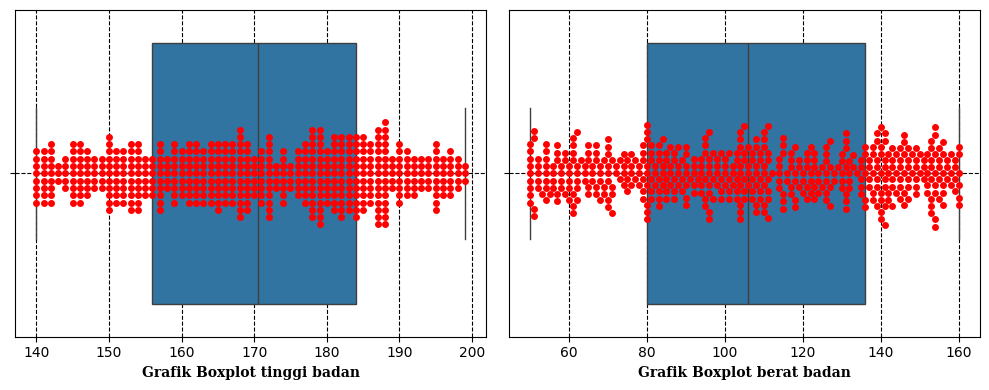

In [19]:
# buat canvas visualisasi dengan ukuran 10 x 4 dan berisi 2 grid visualisasi 
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Visualisasi untuk canvas 1
sns.boxplot(x='Height', data=data, ax=axs[0])               # buat visualisasi boxplot untuk kolom data tinggi badan 
sns.swarmplot(x='Height', data=data, ax=axs[0], color='r')  # buat visualisasi swarmplots untuk kolom tinggi badan 

# visualisasi untuk canvas 2 
sns.boxplot(x='Weight', data=data, ax=axs[1])               # buat visualisasi boxplot untuk kolom data berat badan 
sns.swarmplot(x='Weight', data=data, ax=axs[1], color='r')  # buat visualisasi swarmplots untuk kolom berat badan

# set axis 0 sebagai x label untuk tinggi badan 
axs[0].set_xlabel("Grafik Boxplot tinggi badan",fontsize = 10, fontweight = 'bold',fontfamily = 'serif')

# set axis 1 sebagai y label untuk berat badan 
axs[1].set_xlabel("Grafik Boxplot berat badan",fontsize = 10, fontweight = 'bold', fontfamily = 'serif')

axs[0].grid(color = 'black', linestyle = '--', linewidth = 0.8)
axs[1].grid(color = 'black', linestyle = '--', linewidth = 0.8)

# atur jarak antar grid canvas visualisasi 
plt.tight_layout()

# Menyimpan grafik sebagai file gambar
# plt.savefig('boxplot_height_vs_weight.png')

plt.show()

<b>Insight</b>

insight yang di dapat dari hasil visualisasi tersebut adalah : tidak adanya outliers pada fitur tinggi dan berat badan baik dengan menggunakan visualisasi boxplot maupun swarmplots, sehingga kita bisa menarik kesimpulan bahwa kedua fitur tersebut sudah layak untuk di gunakan untuk pembuatan model

### **2.5 Visualisasi Distribusi Normal dengan ECDF**
---
pada bagian ini kita akan membuat visualisasi untuk mengetahui penyebaran distribusi data dari fitur height dan weight

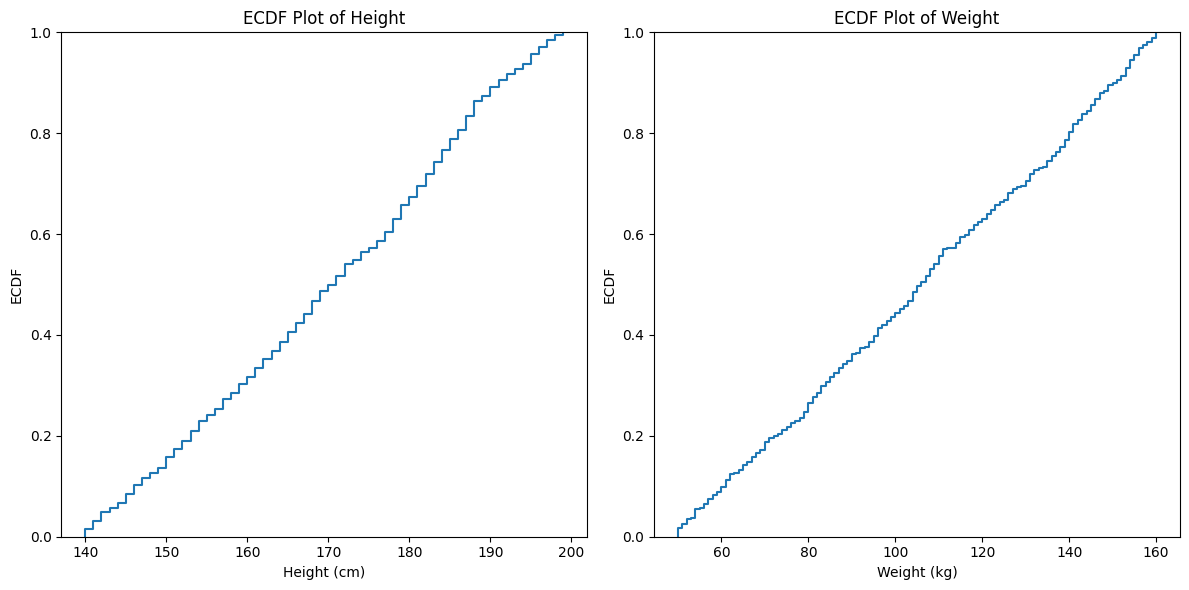

In [20]:
# membuat kode progran untuk analisis ECDF
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.ecdfplot(data['Height'])
plt.xlabel('Height (cm)')
plt.ylabel('ECDF')
plt.title('ECDF Plot of Height')

# Create an ECDF plot for weight
plt.subplot(1, 2, 2)
sns.ecdfplot(data['Weight'])
plt.xlabel('Weight (kg)')
plt.ylabel('ECDF')
plt.title('ECDF Plot of Weight')

# Show the plots
plt.tight_layout()

# Menyimpan grafik sebagai file gambar
# plt.savefig('ECDF_height_vs_weight.png')
plt.show()

<b>Insight : </b>

#### **Analisis distribusi normal dengan visualisasi histogram**
---

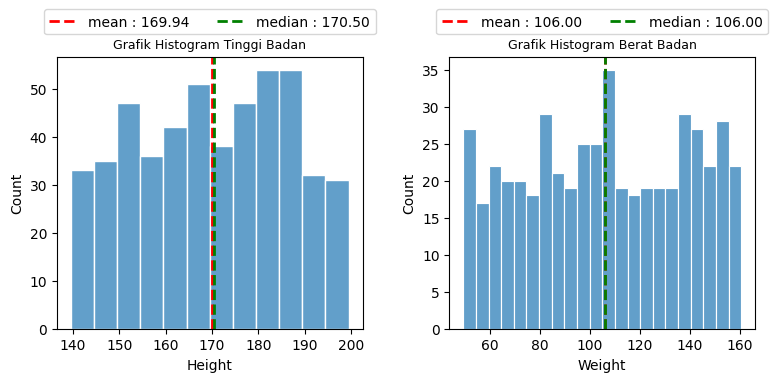

In [21]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))

sns.histplot(x = data['Height'], binwidth=5, 
                binrange=(
                    data['Height'].min()-0.5, 
                    data['Height'].max()+0.5
                    ), alpha = 0.7, ec='w', ax=ax1)

Height_mean = np.mean(data['Height'])
Height_median = np.median(data['Height'])

ax1.axvline(Height_mean, color='red', linestyle='--', linewidth=2, label=f'mean : {Height_mean:.2f}')
ax1.axvline(Height_median, color='green', linestyle='--', linewidth=2, label=f'median : {Height_median:.2f}')

ax1.set_xlabel('Height', fontsize='10')
ax1.legend(loc = 'upper center', bbox_to_anchor =(0.5, 1.20), ncol=2)
ax1.set_title('Grafik Histogram Tinggi Badan', fontsize=9)

sns.histplot(x = data['Weight'], binwidth=5, 
                binrange=(
                    data['Weight'].min()-0.5, 
                    data['Weight'].max()+0.5
                    ), alpha = 0.7, ec='w', ax=ax2)

Weight_mean = np.mean(data['Weight'])
Weight_median = np.median(data['Weight'])

ax2.axvline(Weight_mean, color='red', linestyle='--', linewidth=2, label=f'mean : {Weight_mean:.2f}')
ax2.axvline(Weight_median, color='green', linestyle='--', linewidth=2, label=f'median : {Weight_median:.2f}')

ax2.set_xlabel('Weight', fontsize='10')
ax2.legend(loc = 'upper center', bbox_to_anchor =(0.5, 1.20), ncol=2)
ax2.set_title('Grafik Histogram Berat Badan', fontsize=9)

# Menyimpan grafik sebagai file gambar
# plt.savefig('Historgram_height_vs_weight.png')
plt.tight_layout()
plt.show()

<b>Insight : </b>

### **2.6 Analisis Statistik Deskriptif**

#### **2.6.1 Menghitung BMI Ideal**
---
selanjutnya kita akan membuat kode program untuk menghitung BMI ideal dari kolom berat dan kolom tinggi badan 

In [22]:
# membuat kode program untuk menghitung BMI yang ideal pada tubuh 
data['BMI'] = data.apply(lambda row: row['Height'] / ((row['Weight'] / 100) ** 2), axis=1).round(2)

# tampilkan isi dari dataframe data
data.head()

,Gender,Height,Weight,Index,Status,Label,BMI
0,Male,174,96,4,Obesity,1,188.80
1,Male,189,87,2,Normal,1,249.70
2,Female,185,110,4,Obesity,0,152.89
3,Female,195,104,3,Overweight,0,180.29
4,Male,149,61,3,Overweight,1,400.43


<b>Insight :</b>
<p>berikut adalah berat badan ideal dari setiap kategori dari fitur status pada datasheet bmi berdasarkan tinggi dan berat badan</p>

#### **2.6.2 mengitung rata-rata BMI berdasarkan Gender**

In [23]:
# mengitung rata-rata BMI dari kolom gender 
avg_bmi_by_gender = data.groupby('Gender')['BMI'].mean()

# tampilkan hasil rata-rata
avg_bmi_by_gender.head()

Gender
Female    215.085137
Male      207.861592
Name: BMI, dtype: float64

<b>Insight :</b>
<p>dari sini kita tau bahwa rata-rata BMI berdasarkan Gender ternyata perempuan memiliki rata-rata kenaikan berat badan yang lebih tinggi daripada laki-laki sehingga dari sini kita ketahui ternyata perempuan lebih sulit menjaga berat badan nya, mungkin salah satu faktor nya adalah hormon</p>

#### **2.6.3 Persentase Tiap Status BMI**
---
kita ingin mengetahui berapa persentase dari kolom data BMI berikut

In [24]:
# buat perhitungan untuk persentase status BMI 
bmi_percentage = data['Status'].value_counts(normalize=True).apply(lambda x: x * 100)

# tampilkan hasil dari  persentase BMI                                                                                                                                                                                                                             
bmi_percentage.head()

Status
Extreame Obesity    39.6
Obesity             26.0
Normal              13.8
Overweight          13.6
Weak                 4.4
Name: proportion, dtype: float64

<b>Insight : </b>
<p>dari insight berikut kita tau bahwa extreame obesity memiliki persentase yang lebih besar ketimbang dengan status bmi lainnya ini memberikan insight untuk kita agar fokus pada masalah obesitas yang berlebih yang dialami oleh laki-lkai maupun perempuan</p>

#### **2.6.4 Analisis Perbandingan Berat dan Tinggi**
---
pada tahap ini kita akan membuat analisis untuk perbandingan antara berat dan tinggi badan

In [25]:
# Menghitung rata-rata berat badan berdasarkan gender
avg_weight_by_gender = data.groupby('Gender')['Weight'].transform('mean')

# Menambahkan kolom 'weight_comparison' berdasarkan rata-rata berat badan
data['weight_comparison'] = data.apply(
    lambda row: 'Above Average' if row['Weight'] > avg_weight_by_gender[row.name] else 'Below Average', axis=1
)

# tampilkan isi dari hasil perhitungan berat badan berdasrakan gender
print(data)

     Gender  Height  Weight  Index            Status  Label     BMI  \
0      Male     174      96      4           Obesity      1  188.80   
1      Male     189      87      2            Normal      1  249.70   
2    Female     185     110      4           Obesity      0  152.89   
3    Female     195     104      3        Overweight      0  180.29   
4      Male     149      61      3        Overweight      1  400.43   
..      ...     ...     ...    ...               ...    ...     ...   
495  Female     150     153      5  Extreame Obesity      0   64.08   
496  Female     184     121      4           Obesity      0  125.67   
497  Female     141     136      5  Extreame Obesity      0   76.23   
498    Male     150      95      5  Extreame Obesity      1  166.20   
499    Male     173     131      5  Extreame Obesity      1  100.81   

    weight_comparison  
0       Below Average  
1       Below Average  
2       Above Average  
3       Below Average  
4       Below Average  
.. 

<b>Insight : </b>


#### **2.6.5 Membuat visualisasi pie chart untuk tipe data kategorik**
---
pada bagian ini kita akan membuat visualisasi pie chart untuk data kategorik

C:\Users\AlanFirdaus-ITMS\AppData\Local\Temp\ipykernel_6548\1417697067.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=15)


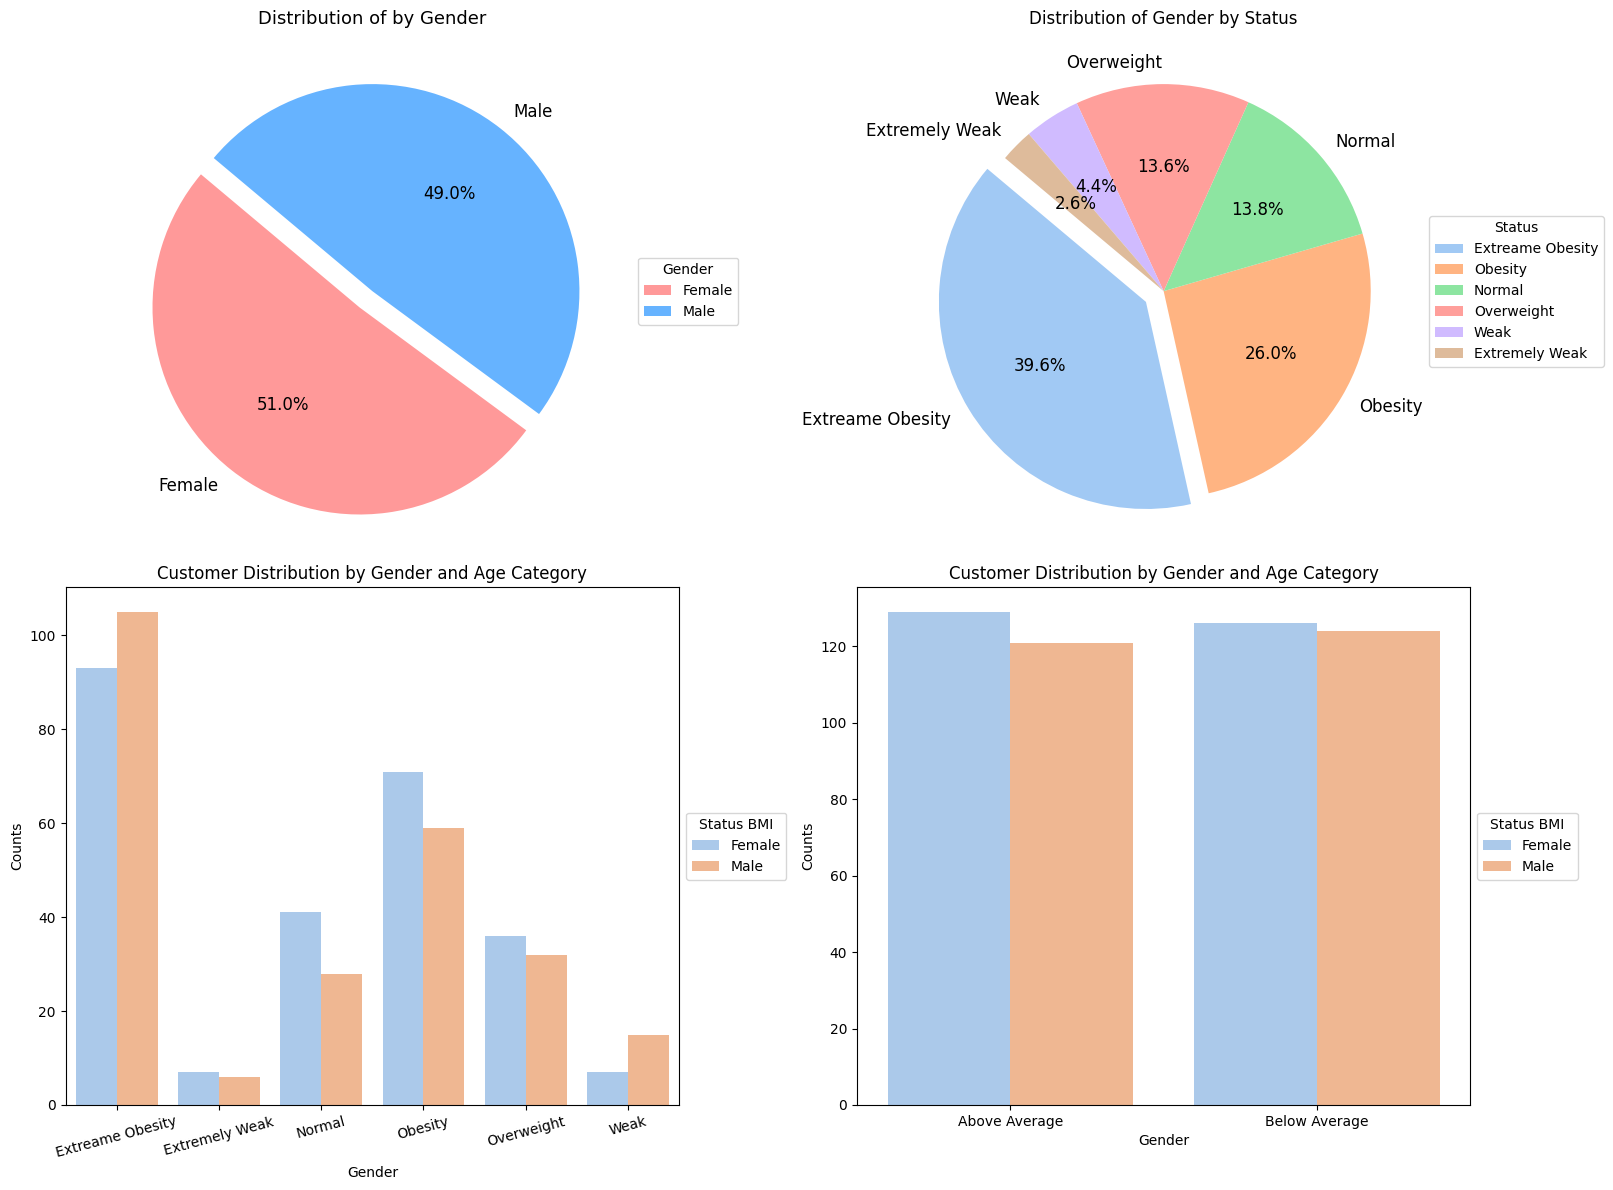

In [26]:
# buat variabel untuk Jumlah kategori status BMI
status_categoy_counts = data['Status'].value_counts()

# Buat canvas Visualisasi dengan ukuran 16 x 12 yang terdiri dari 2 grid visualisais pada setiap 1 baris 
fig, axes = plt.subplots(2,2, figsize=(16, 12))

gender_explode = [0.1, 0]   # Buat variabel untuk 
gender_counts = data['Gender'].value_counts()   # buat variabel untuk menghitung jumlah gender 
# buat visualisasi pie chart
wedges, texts, autotexts = axes[0, 0].pie(
    gender_counts, labels=gender_counts.index, autopct='%1.1f%%', 
    startangle=140, colors=['#ff9999','#66b3ff'], textprops={'fontsize': 12}, explode=gender_explode)

axes[0,0].set_title('Distribution of by Gender', fontsize=13, fontfamily='sans serif')
axes[0, 0].legend(wedges, gender_counts.index, title="Gender", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=10)

# Pie Chart untuk Kategori Usia
age_category_explode = [0.1, 0, 0, 0, 0, 0]
age_category_counts = data['Status'].value_counts()
wedges, texts, autotexts = axes[0, 1].pie(
    age_category_counts, labels=age_category_counts.index, autopct='%1.1f%%', 
    startangle=140, textprops={'fontsize': 12}, colors=sns.color_palette("pastel"), explode=age_category_explode)

axes[0, 1].set_title('Distribution of Gender by Status')
axes[0, 1].legend(wedges, age_category_counts.index, title="Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=10)

# Bar Chart untuk Gender dan Kategori Usia Group by Gender dan AgeCategory untuk pie chart dan bar chart
grouped_df = data.groupby(['Gender', 'Status']).size().reset_index(name='Counts')
sns.barplot(x='Status', y='Counts', hue='Gender', data=grouped_df, palette='pastel', ax=axes[1, 0])

axes[1, 0].legend(title='Status BMI', loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=10)
axes[1, 0].set_title('Customer Distribution by Gender and Age Category')
axes[1, 0].set_xlabel('Gender')
axes[1, 0].set_ylabel('Counts')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=15)

# Bar Chart untuk Gender dan Kategori Usia Group by Gender dan AgeCategory untuk pie chart dan bar chart
grouped_df = data.groupby(['weight_comparison', 'Gender']).size().reset_index(name='Counts')
sns.barplot(x='weight_comparison', y='Counts', hue='Gender', data=grouped_df, palette='pastel', ax=axes[1, 1])

axes[1, 1].legend(title='Status BMI', loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=10)
axes[1, 1].set_title('Customer Distribution by Gender and Age Category')
axes[1, 1].set_xlabel('Gender')
axes[1, 1].set_ylabel('Counts')

# plt.savefig('Comparison Pie chart Gender.png')
plt.tight_layout()
plt.show()

<b>Insight : </b>
<p>Dari hasil visualisasi diatas dapat diketahui </p>
<ul>
    <li>1.Pada datasheet kita jumlah jenis kelamin perempuan lebih banyak dibandingkan dengan laki-laki tapi</li>
    <li>2.Pada grafik pie menunjukan bahwa status BMI menunjukan pengidap extreame obesity lebih banyak dalam kasus ini</li>
    <li>3.Dari grafik batang menunjukan bahwa jenis kelamin laki-laki lebih rentang mengalami kenaikan badan dibandingkan perempuan</li>
</ul>
<p>kita akan mencari tau lebih detail jenis kelamin mana yang memiliki intensitas kenaikan status bmi untuk setiap kategori nya, dengan melakukan visualisasi data dengan pie chart lebih lanjut</p>

#### **2.6.6 Analisis proporsi status BMI berdasarkan jenis kelamin perempuan dan laki-laki**
---
kali ini kita akan mencoba melakukan analisis untuk mencari hubungan antara berat dan tingi badan terhadap status kesehatan melalui visualisasi pie chart

In [27]:
# buat variabel untuk menyimpan kategori jenis kelamin perempuan dan laki-laki 
female_categories = cat_female['Status'].value_counts()
male_categories = cat_male['Status'].value_counts()

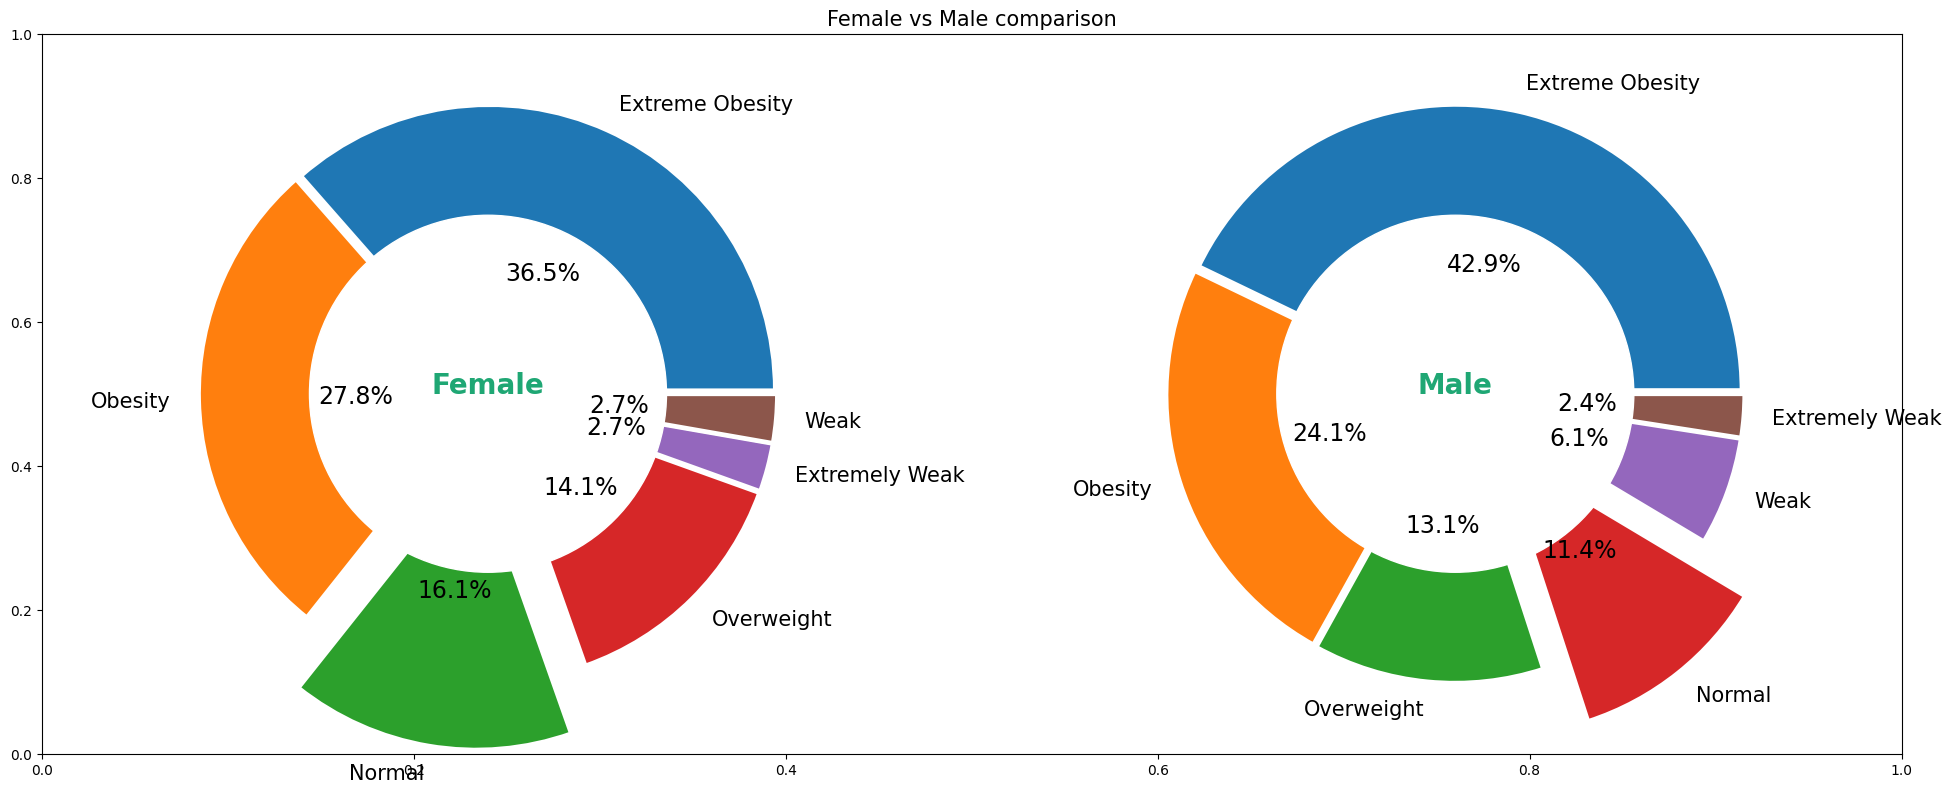

In [28]:
fig = plt.figure(figsize=(20,8))
plt.title("Female vs Male comparison",loc='center',weight=10,size=15)

# first pie-plot
ax1 = fig.add_subplot(121)
ax1.axis('equal')
explode = (0.01,0.01,0.2,0.01,0.01,0.01)

wedges, texts, autotexts =  ax1.pie(
    female_categories, radius=0.8, explode=explode, labels=['Extreme Obesity','Obesity','Normal','Overweight','Extremely Weak','Weak'],
    autopct="%1.1f%%", pctdistance=0.45,textprops=dict(color='k'), wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' })

plt.setp(autotexts,size=17)
plt.setp(texts,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')

p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes
ax1.text(0,0,'Female',size=20,color='#1fa774',horizontalalignment='center',weight='bold')

# Second pie-plot
ax2 = fig.add_subplot(122)
ax2.axis('equal')
explode = (0.01,0.01,0.01,0.2,0.01,0.01)
wedges2, texts2, autotexts2 =  ax2.pie(
    male_categories, radius=0.8, explode=explode, labels=['Extreme Obesity','Obesity','Overweight','Normal','Weak','Extremely Weak'],
    autopct="%1.1f%%", pctdistance=0.45, textprops=dict(color='k'), wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' })

plt.setp(autotexts2,size=17)
plt.setp(texts2,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')

p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes
ax2.text(0,0,'Male',size=20,color='#1fa774',horizontalalignment='center',weight='bold')

# simpan hasil visualisasi 
# plt.savefig('Comparison Female vs male.png')

plt.tight_layout()
plt.show()

<b>Insight :</b>
berdasarkan hasil visualisasi diatas dapat diambil sebuah kesimpulan ternyata jenis kelamin laki-laki memiliki kenaikan berat badan yang signifikan dibandingkan dengan jenis kelamin perempuan dari sini kita tau bahwa laki-laki sulit menjaga kesehatan, sehingga kedepan nya kita bisa melakukan penyuluhan tentang pola hidup sehat

### **2.7 Analisis Korelasi data dengan visualisasi scatter plot**
---
kita telah sampai pada bagian akhir dari proses EDA, untuk tahap ini kita akan mencoba untuk mencari hubungan antara setiap fitur numerik dari datasheet yang kita punya serta menentukan model machine learning apa yang cocok untuk datasheet kita, sehingga nanti nya bisa digunakan ke tahap produksi

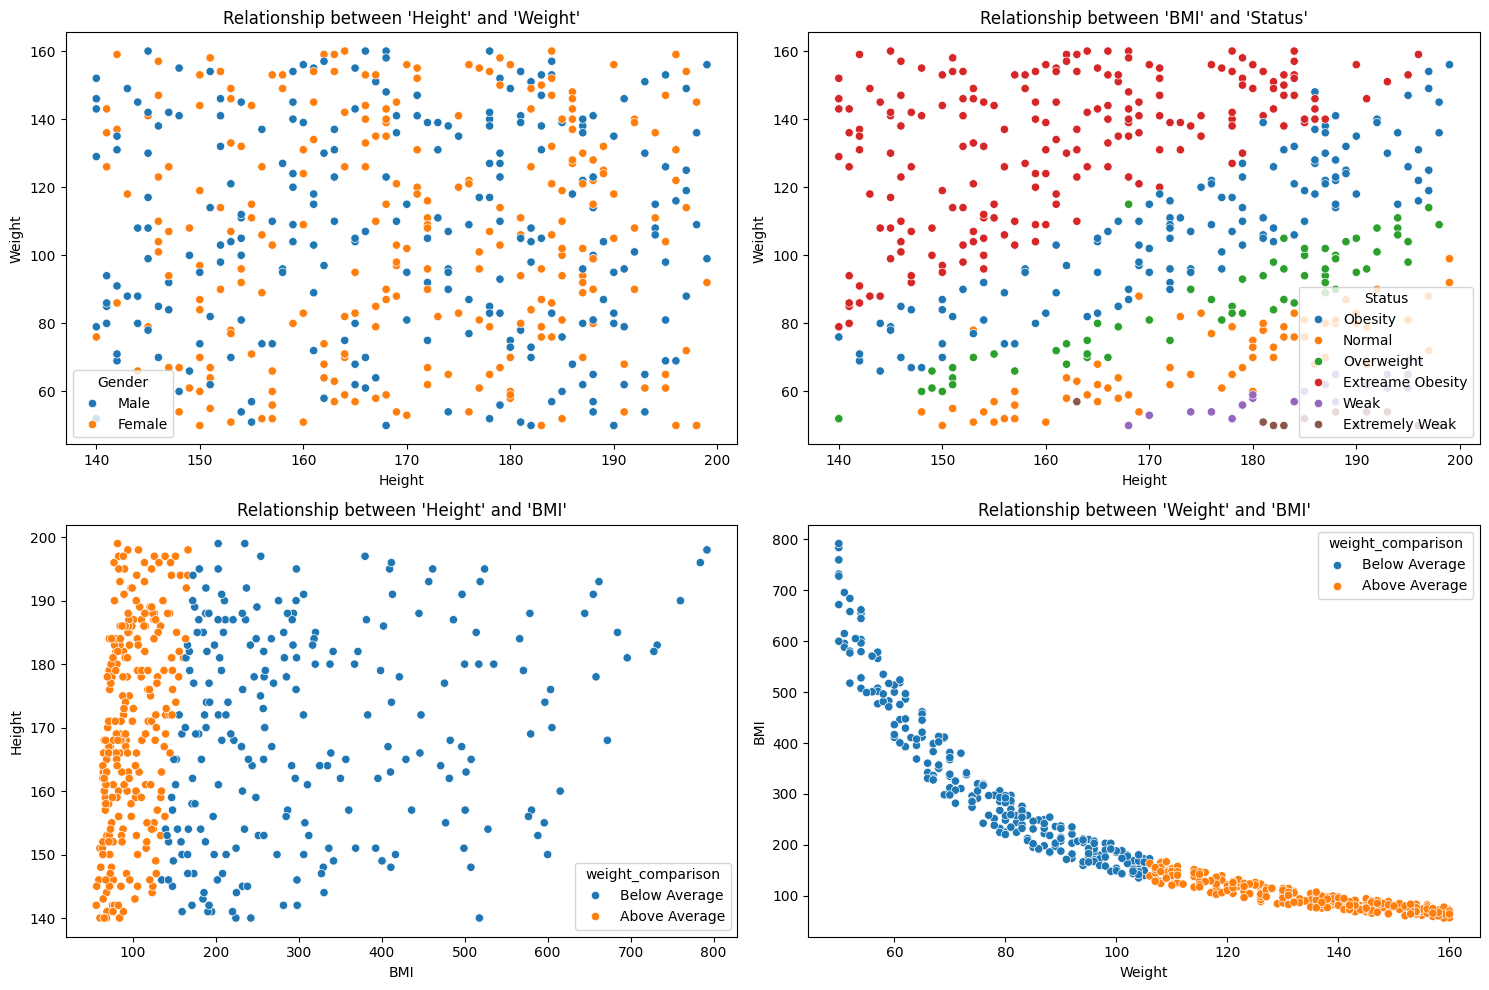

In [29]:
# buat canvas dengan ukuran 15 x 10 dan buat visualisasi data scatterplot untuk kolom height, weight, status dan weight comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

# buat visualisasi di ax 0 untuk hubungan antara tinggi, berat badan terhadap jenis kelamin 
sns.scatterplot(
    ax = axes[0], x = "Height",y = "Weight", hue = "Gender",
    data = data).set(title = "Relationship between 'Height' and 'Weight'");

# buat visualisasi di ax 1 untuk hubungan antara tinggi, berat badan terhadap status 
sns.scatterplot(
    ax = axes[1], x = "Height", y = "Weight", hue = "Status",
    data = data).set(title = "Relationship between 'BMI' and 'Status'");

# buat visualisasi di ax 2 untuk hubungan antara BMI, tinggi badan terhadap berat badan 
sns.scatterplot(
    ax = axes[2], x = "BMI", y = "Height", hue = "weight_comparison",
data = data).set(title = "Relationship between 'Height' and 'BMI'");

# buat visualisasi di ax 3 untuk hubungan antara BMI, berat badan terhadap berat badan 
sns.scatterplot(
    ax = axes[3], x = "Weight", y = "BMI", hue = "weight_comparison",
    data = data).set(title = "Relationship between 'Weight' and 'BMI'");

# plt.savefig('Comparison Scatter Plot')
plt.tight_layout()
plt.show()


<b>Insight : </b>
dari visualisasi diatas kita dapat menarik beberala kesimpulan sebagai berikut : 
<ul>
    <li>1. pada kolom tinggi badan dan berat badan ternyata tidak memiliki korelasi satu sama lain</li>
    <li>2. sama seperti poin nomor 1 pada kolom status pun ternyata hasil nya sama saja dan tidak ada korelasi</li>
    <li>3. di hubungan antara weight comparison dan tinggi badan ternyata tidak berkorelasi sama sekali</li>
</ul>

#### **2.7.1 Visualisasi dengan Heatmap**
---
untuk lebih jelas nya kita akan mencoba menggunakan visualisasi heatmap untuk mendapatkan korelasi dari kolom bertipe data numerik 

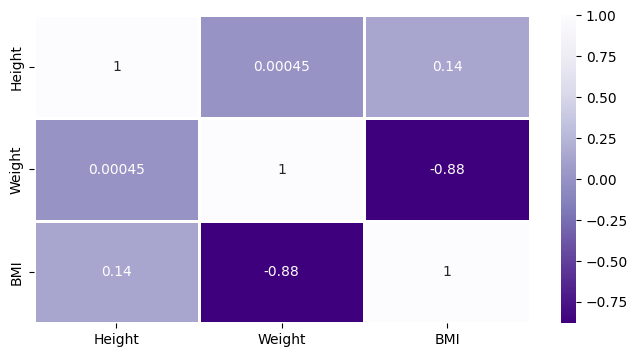

In [30]:
plt.figure(figsize = [8, 4], facecolor = 'white')
sns.heatmap(data[['Height','Weight','BMI']].corr('pearson'), annot = True, linewidths = 2, cmap = "Purples_r");

plt.savefig('Visualisation Heatmap')

<b>Insight :</b>
<p>dari hasil visualisasi diatas score yang kita dapatkan untuk menentukan seberapa berpengaruh sebuah fitur dengan fitur lainnya. pada gambar diatas ternyata kita tidak mendapatkan korelasi memuaskan meskipun begitu kita akan mencoba menggunakan model machine learning untuk analisis lebih lanjut dengan menggunakan algoritma tree-based yang tahan terhadap rentan nilai yang tidak proposional dan gannguan outliers meskipun pada data kita hanya mengalai rentan nilai yang tidak terlalu jauh antara fitur berat dan tinggi badan</p>

## **3.Menyimpan file hasil analisis eda**

In [31]:
# simpan file eda dalam bentuk csv Menyimpan data ke file CSV setelah preprocessing
output_path = 'EDA.csv'  # Simpan file di lokasi script

data.to_csv(output_path, index=False)